# Balanced Case

Inputs balanceados, métricas da rede ("rssi", "etx", "delay", "busy_fraction") muito estáveis, e estatísticas do RADNET ("apmr_edge", "mfsr_edge", "idg_global") equilibradas.

## Inputs

In [156]:
%run 1.inputs.ipynb

Edges Inputs salvo em ../datasets/edges_input.csv
Radnet Input salvo em ../datasets/radnet_input.csv


## Dataset

In [157]:
%run 2.dataset.ipynb

Dataset salvo em ../datasets/edges_dataset.csv


## Train

In [158]:
%run 3.train.ipynb

Epoch    Loss       Train Acc    Test Acc  
------------------------------------------
0        0.7159     0.5000       0.5000    
10       0.3194     0.9554       0.9598    
20       0.1338     0.9706       0.9719    
30       0.0806     0.9755       0.9759    
40       0.0630     0.9788       0.9787    
Modelo salvo em ../models/gnn_model.pth
Modelo salvo em ../models/scaler_model.pkl


## Inference

In [159]:
%run 4.inference.ipynb

RSSI   ETX   Delay  Busy   Classe   Status   Confiança 
-------------------------------------------------------
-63    6.3   69     0.66   0        Ruim     1.00      
-52    2.3   4      0.34   1        Bom      1.00      
-69    6.0   61     0.62   0        Ruim     1.00      
-53    2.6   19     0.17   1        Bom      1.00      
-58    5.5   21     0.31   1        Bom      0.75      
-72    3.3   79     0.25   0        Ruim     0.96      
-75    6.4   38     0.63   0        Ruim     0.99      
-54    1.9   7      0.23   1        Bom      1.00      
-50    2.6   3      0.19   1        Bom      1.00      
-72    8.7   62     0.77   0        Ruim     1.00      
-52    2.7   38     0.27   1        Bom      0.97      
-63    3.4   99     0.36   0        Ruim     0.99      
-56    5.7   100    0.86   0        Ruim     1.00      
-77    2.7   18     0.20   1        Bom      0.94      
-43    2.9   15     0.16   1        Bom      1.00      
-86    3.4   80     0.59   0        Ruim     1.0

## Fusion

In [160]:
%run 5.fusion.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
----------------------------------------------------------------------
-63    6.3   69     0.66   0.48   0.72   0.56   0        Ruim     0.64      
-52    2.3   4      0.34   0.73   0.91   0.75   1        Bom      0.88      
-69    6.0   61     0.62   0.82   0.91   0.88   1        Bom      0.52      
-53    2.6   19     0.17   0.91   0.85   0.84   1        Bom      0.92      
-58    5.5   21     0.31   0.51   0.58   0.78   1        Bom      0.65      
-72    3.3   79     0.25   0.86   0.86   0.78   1        Bom      0.52      
-75    6.4   38     0.63   0.82   0.56   0.72   0        Ruim     0.58      
-54    1.9   7      0.23   0.52   0.75   0.64   1        Bom      0.78      
-50    2.6   3      0.19   0.52   0.68   0.64   1        Bom      0.77      
-72    8.7   62     0.77   0.48   0.65   0.55   0        Ruim     0.66      
-52    2.7   38     0.27   0.71   0.60   0.68   1        Bom      0.78      
-63  

## Kalman

In [161]:
%run 6.kalman.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
---------------------------------------------------------------------------
-63    6.3   69     0.66   0.48   0.72   0.56   0        Ruim     0.64      
-52    2.3   4      0.34   0.73   0.91   0.75   1        Bom      0.88      
-69    6.0   61     0.62   0.82   0.91   0.88   1        Bom      0.70      
-53    2.6   19     0.17   0.91   0.85   0.84   1        Bom      0.77      
-58    5.5   21     0.31   0.51   0.58   0.78   1        Bom      0.74      
-72    3.3   79     0.25   0.86   0.86   0.78   1        Bom      0.70      
-75    6.4   38     0.63   0.82   0.56   0.72   1        Bom      0.65      
-54    1.9   7      0.23   0.52   0.75   0.64   1        Bom      0.67      
-50    2.6   3      0.19   0.52   0.68   0.64   1        Bom      0.68      
-72    8.7   62     0.77   0.48   0.65   0.55   1        Bom      0.64      
-52    2.7   38     0.27   0.71   0.60   0.68   1        Bom      0.65      


## Results

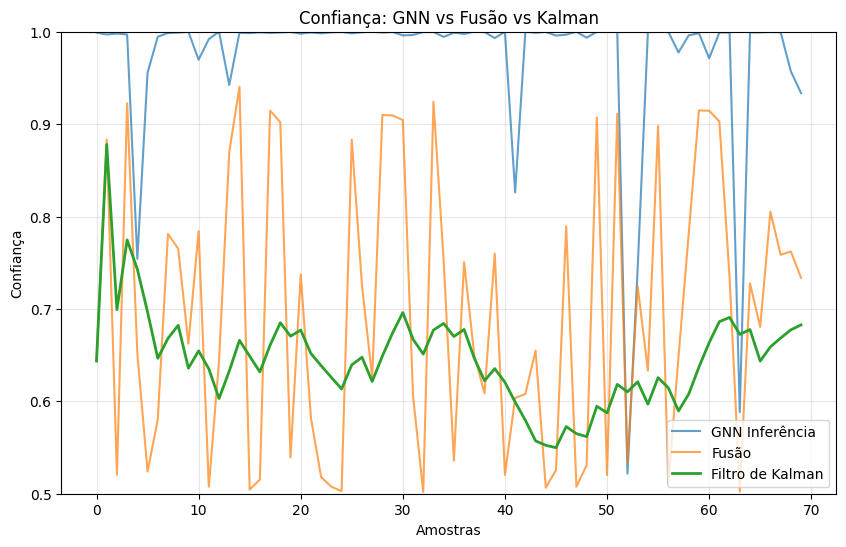

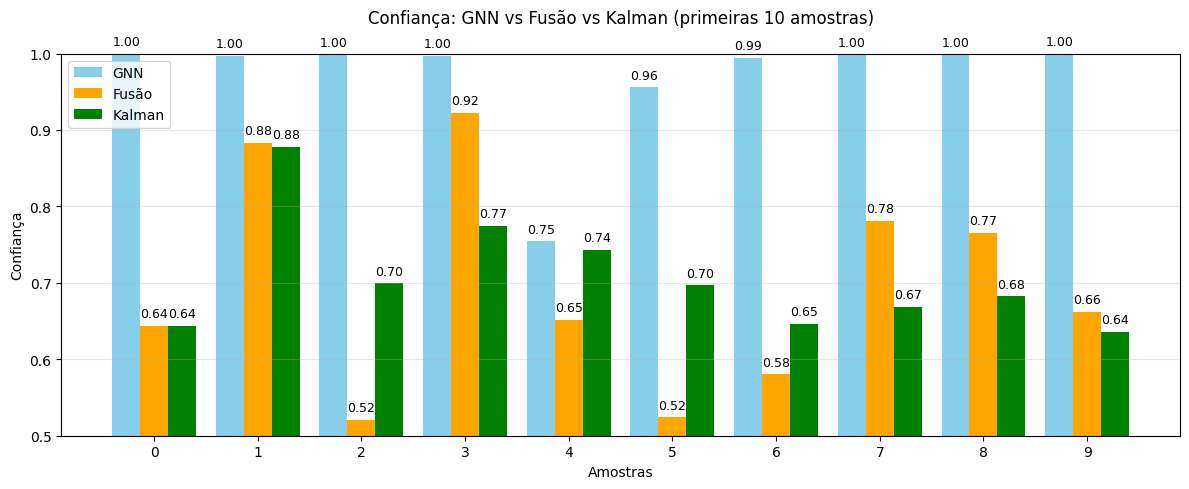

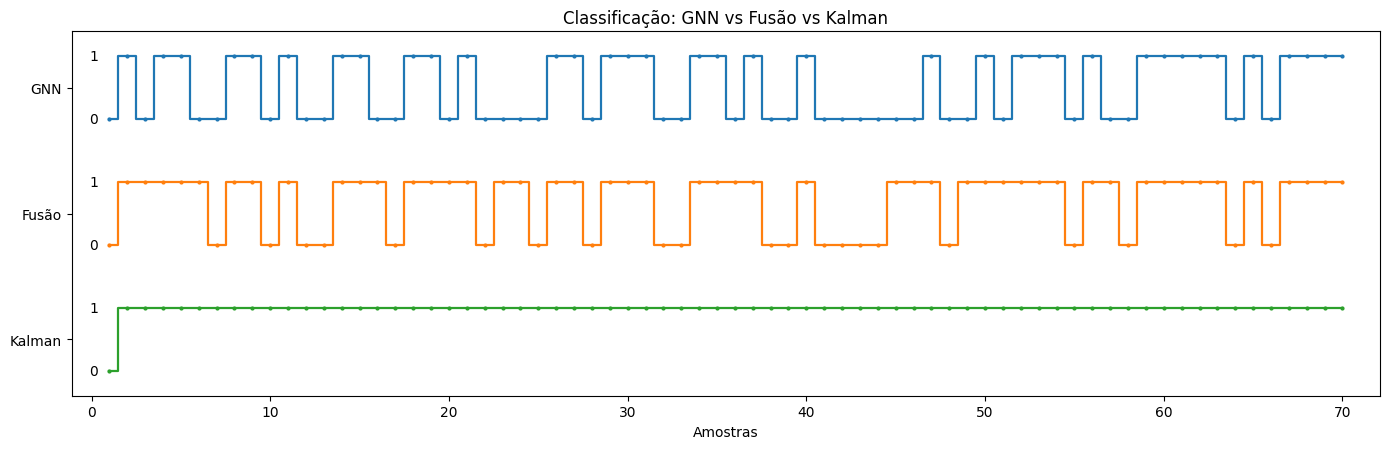

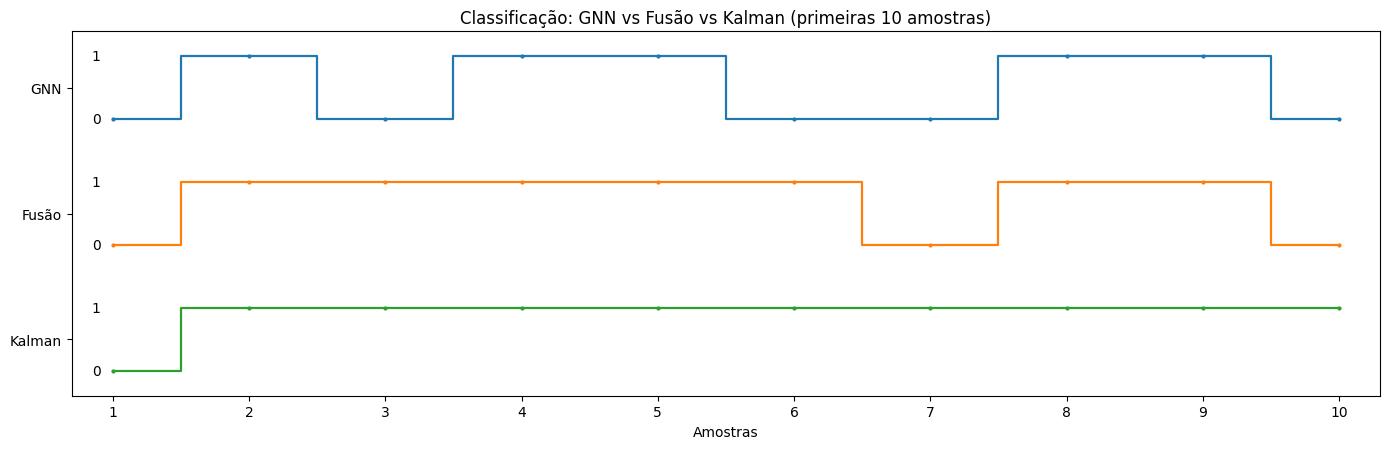

In [162]:
%run 7.results.ipynb

# Worst Case

Inputs péssimos, métricas da rede ("rssi", "etx", "delay", "busy_fraction") muito ruins, e estatísticas do RADNET ("apmr_edge", "mfsr_edge", "idg_global") baixas.

## Inputs

### Imports

In [163]:
import os
import pandas as pd
import numpy as np

### Parameters

In [164]:
num_samples = 70 # quantidade de exemplos

### Worst Inputs

In [165]:
edge_inputs = []

while len(edge_inputs) < num_samples:
    # Gerar sempre métricas ruins para edge inputs
    # Forçar pelo menos 2 métricas ruins por amostra
    
    # RSSI: sempre baixo (sinal fraco)
    rssi = np.random.uniform(-90, -60)  
    
    # ETX: tendência para alto (mais retransmissões)
    etx = np.random.uniform(4, 10)
    
    # Delay: tendência para alto
    delay = np.random.uniform(30, 100)
    
    # Busy fraction: tendência para alto (canal ocupado)
    busy_fraction = np.random.uniform(0.3, 1.0)
    
    # Adicionar algumas variações extremas
    extreme_factor = 0.3
    if np.random.random() < extreme_factor:
        if np.random.random() < 0.5:
            rssi = np.random.uniform(-95, -85)  # RSSI muito baixo
        if np.random.random() < 0.5:
            etx = np.random.uniform(7, 10)      # ETX muito alto
        if np.random.random() < 0.5:
            delay = np.random.uniform(70, 100)  # Delay muito alto
        if np.random.random() < 0.5:
            busy_fraction = np.random.uniform(0.8, 1.0)  # Canal muito ocupado
    
    # Arredondar valores
    rssi = round(rssi, 1)
    etx = round(etx, 1)
    delay = round(delay)
    busy_fraction = round(busy_fraction, 2)
    
    edge_inputs.append([rssi, etx, delay, busy_fraction])

In [166]:
radnet_inputs = []

while len(radnet_inputs) < num_samples:
    # Gerar sempre métricas ruins para radnet
    # Cenários de alta mobilidade, muitos pares, rede congestionada
    
    # APMR: tendência baixa (prefixes ineficientes)
    apmr_edge = np.random.uniform(0.45, 0.65)
    
    # MFSR: tendência baixa (baixa taxa de sucesso)
    mfsr_edge = np.random.uniform(0.50, 0.70)
    
    # IDG: tendência baixa (entrega difícil em grupo)
    idg_global = np.random.uniform(0.45, 0.65)
    
    # Adicionar casos extremamente ruins
    extreme_factor = 0.25
    if np.random.random() < extreme_factor:
        if np.random.random() < 0.5:
            apmr_edge = np.random.uniform(0.45, 0.55)  # APMR muito baixo
        if np.random.random() < 0.5:
            mfsr_edge = np.random.uniform(0.50, 0.60)  # MFSR muito baixo
        if np.random.random() < 0.5:
            idg_global = np.random.uniform(0.45, 0.55)  # IDG muito baixo
    
    # Garantir ranges válidos
    apmr_edge = max(0.45, min(0.70, apmr_edge))
    mfsr_edge = max(0.50, min(0.75, mfsr_edge))
    idg_global = max(0.45, min(0.70, idg_global))
    
    # Arredondar valores
    apmr_edge = round(apmr_edge, 6)
    mfsr_edge = round(mfsr_edge, 6)
    idg_global = round(idg_global, 2)
    
    radnet_inputs.append([apmr_edge, mfsr_edge, idg_global])

### Save

In [167]:
edges_input = pd.DataFrame(edge_inputs, columns=["rssi", "etx", "delay", "busy_fraction"])
os.makedirs("../inputs", exist_ok=True)
edges_input.to_csv("../inputs/edges_input.csv", index=False)

print("Edges Inputs salvo em ../datasets/edges_input.csv")

Edges Inputs salvo em ../datasets/edges_input.csv


In [168]:
radnet_input = pd.DataFrame(radnet_inputs, columns=["apmr_edge", "mfsr_edge", "idg_global"])
os.makedirs("../inputs", exist_ok=True)
radnet_input.to_csv("../inputs/radnet_input.csv", index=False)

print("Radnet Input salvo em ../datasets/radnet_input.csv")

Radnet Input salvo em ../datasets/radnet_input.csv


## Dataset

In [169]:
%run 2.dataset.ipynb

Dataset salvo em ../datasets/edges_dataset.csv


## Train

In [170]:
%run 3.train.ipynb

Epoch    Loss       Train Acc    Test Acc  
------------------------------------------
0        0.5850     0.6284       0.6724    
10       0.2592     0.9455       0.9518    
20       0.1114     0.9710       0.9731    
30       0.0700     0.9772       0.9786    
40       0.0564     0.9803       0.9812    
Modelo salvo em ../models/gnn_model.pth
Modelo salvo em ../models/scaler_model.pkl


## Inference

In [171]:
%run 4.inference.ipynb

RSSI   ETX   Delay  Busy   Classe   Status   Confiança 
-------------------------------------------------------
-67    4.8   60     0.95   0        Ruim     1.00      
-75    5.6   42     0.63   0        Ruim     1.00      
-87    7.0   53     0.99   0        Ruim     1.00      
-69    6.8   76     0.98   0        Ruim     1.00      
-75    5.7   86     0.39   0        Ruim     1.00      
-76    7.1   42     0.88   0        Ruim     1.00      
-77    9.3   77     0.95   0        Ruim     1.00      
-89    10.0  87     0.67   0        Ruim     1.00      
-78    7.7   87     0.49   0        Ruim     1.00      
-94    9.0   96     0.31   0        Ruim     1.00      
-91    7.7   31     0.96   0        Ruim     1.00      
-66    5.9   31     0.70   0        Ruim     1.00      
-75    10.0  74     0.77   0        Ruim     1.00      
-61    9.5   36     0.52   0        Ruim     1.00      
-84    9.9   85     0.74   0        Ruim     1.00      
-72    4.6   68     0.47   0        Ruim     0.9

## Fusion

In [172]:
%run 5.fusion.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
----------------------------------------------------------------------
-67    4.8   60     0.95   0.51   0.60   0.49   0        Ruim     0.67      
-75    5.6   42     0.63   0.45   0.67   0.56   0        Ruim     0.66      
-87    7.0   53     0.99   0.54   0.65   0.51   0        Ruim     0.65      
-69    6.8   76     0.98   0.63   0.70   0.49   0        Ruim     0.62      
-75    5.7   86     0.39   0.58   0.61   0.51   0        Ruim     0.65      
-76    7.1   42     0.88   0.46   0.63   0.47   0        Ruim     0.68      
-77    9.3   77     0.95   0.56   0.69   0.48   0        Ruim     0.64      
-89    10.0  87     0.67   0.62   0.69   0.57   0        Ruim     0.62      
-78    7.7   87     0.49   0.64   0.60   0.45   0        Ruim     0.64      
-94    9.0   96     0.31   0.54   0.60   0.54   0        Ruim     0.66      
-91    7.7   31     0.96   0.56   0.50   0.63   0        Ruim     0.67      
-66  

## Kalman

In [173]:
%run 6.kalman.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
---------------------------------------------------------------------------
-67    4.8   60     0.95   0.51   0.60   0.49   0        Ruim     0.67      
-75    5.6   42     0.63   0.45   0.67   0.56   0        Ruim     0.66      
-87    7.0   53     0.99   0.54   0.65   0.51   0        Ruim     0.66      
-69    6.8   76     0.98   0.63   0.70   0.49   0        Ruim     0.64      
-75    5.7   86     0.39   0.58   0.61   0.51   0        Ruim     0.65      
-76    7.1   42     0.88   0.46   0.63   0.47   0        Ruim     0.65      
-77    9.3   77     0.95   0.56   0.69   0.48   0        Ruim     0.65      
-89    10.0  87     0.67   0.62   0.69   0.57   0        Ruim     0.64      
-78    7.7   87     0.49   0.64   0.60   0.45   0        Ruim     0.64      
-94    9.0   96     0.31   0.54   0.60   0.54   0        Ruim     0.65      
-91    7.7   31     0.96   0.56   0.50   0.63   0        Ruim     0.65      


## Results

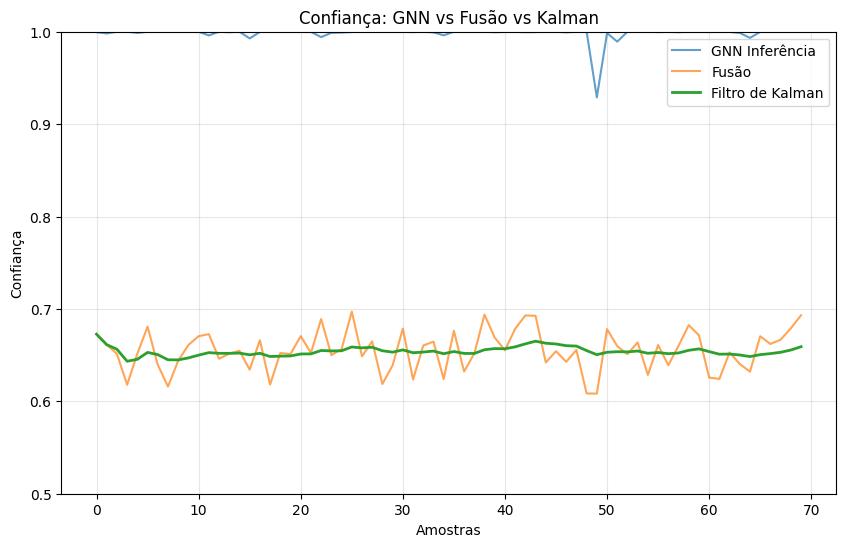

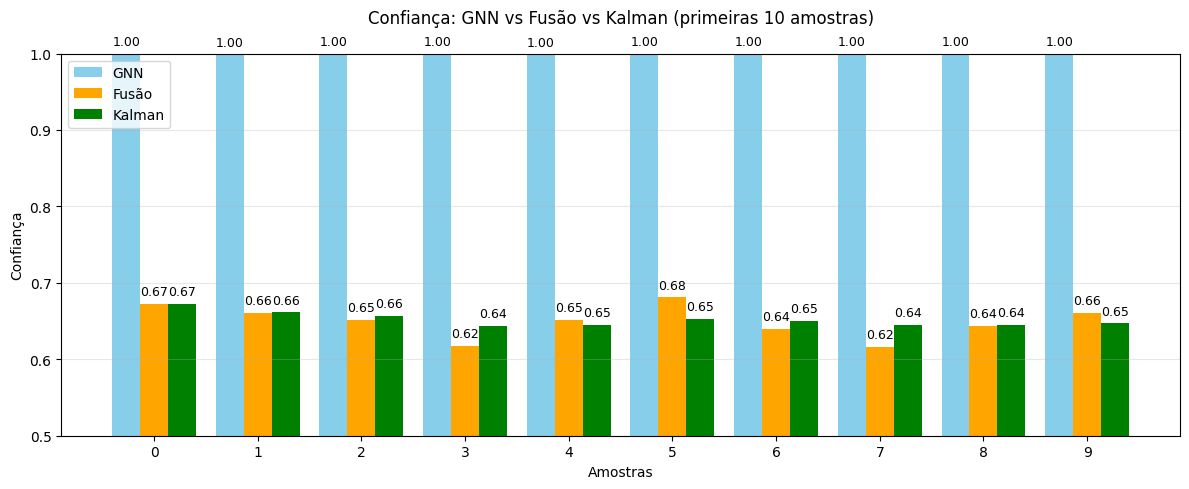

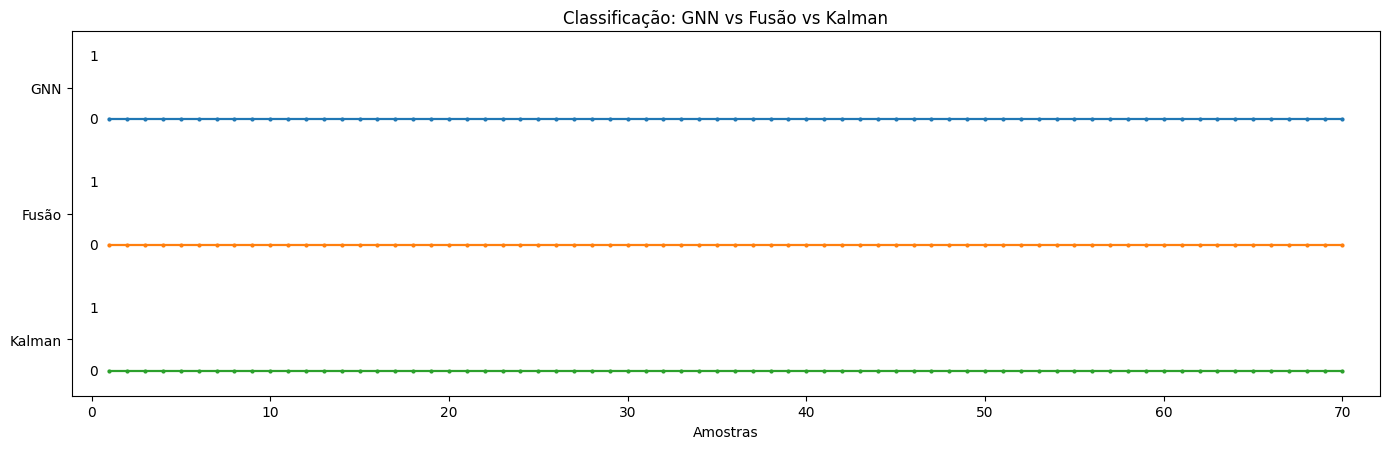

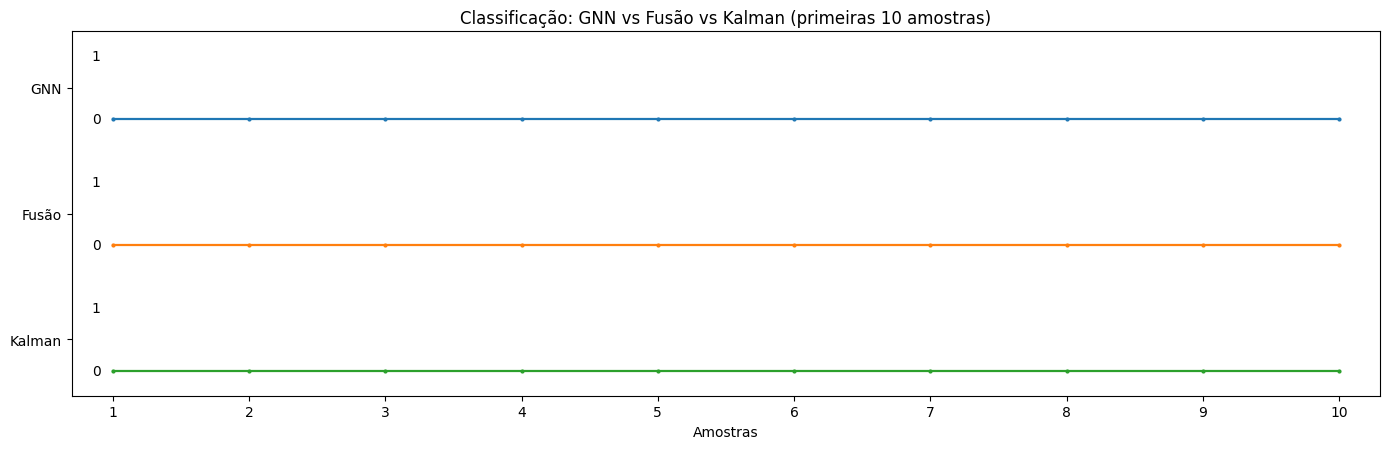

In [174]:
%run 7.results.ipynb

# Best Case

Inputs ótimos, métricas da rede ("rssi", "etx", "delay", "busy_fraction") quase perfeitas, e estatísticas do RADNET ("apmr_edge", "mfsr_edge", "idg_global") altas.

## Inputs

### Imports

In [175]:
import os
import pandas as pd
import numpy as np

### Parameters

In [176]:
num_samples = 70 # quantidade de exemplos

### Best Inputs

In [177]:
edge_inputs = []

while len(edge_inputs) < num_samples:
    # Gerar sempre métricas boas para edge inputs
    
    # RSSI: sempre alto (sinal forte)
    rssi = np.random.uniform(-65, -30)  
    
    # ETX: tendência para baixo (poucas retransmissões)
    etx = np.random.uniform(1, 4)
    
    # Delay: tendência para baixo
    delay = np.random.uniform(1, 40)
    
    # Busy fraction: tendência para baixo (canal livre)
    busy_fraction = np.random.uniform(0, 0.4)
    
    # Adicionar algumas variações extremas boas
    extreme_factor = 0.3
    if np.random.random() < extreme_factor:
        if np.random.random() < 0.5:
            rssi = np.random.uniform(-45, -30)  # RSSI muito alto
        if np.random.random() < 0.5:
            etx = np.random.uniform(1, 2)       # ETX muito baixo
        if np.random.random() < 0.5:
            delay = np.random.uniform(1, 20)    # Delay muito baixo
        if np.random.random() < 0.5:
            busy_fraction = np.random.uniform(0, 0.2)  # Canal muito livre
    
    # Arredondar valores
    rssi = round(rssi, 1)
    etx = round(etx, 1)
    delay = round(delay)
    busy_fraction = round(busy_fraction, 2)
    
    edge_inputs.append([rssi, etx, delay, busy_fraction])

In [178]:
radnet_inputs = []

while len(radnet_inputs) < num_samples:
    # Gerar sempre métricas boas para radnet
    # Cenários de baixa mobilidade, poucos pares, rede estável
    
    # APMR: tendência alta (prefixes eficientes)
    apmr_edge = np.random.uniform(0.75, 0.95)
    
    # MFSR: tendência alta (alta taxa de sucesso)
    mfsr_edge = np.random.uniform(0.80, 0.95)
    
    # IDG: tendência alta (entrega eficiente em grupo)
    idg_global = np.random.uniform(0.70, 0.90)
    
    # Adicionar casos extremamente bons
    extreme_factor = 0.25
    if np.random.random() < extreme_factor:
        if np.random.random() < 0.5:
            apmr_edge = np.random.uniform(0.85, 0.95)  # APMR muito alto
        if np.random.random() < 0.5:
            mfsr_edge = np.random.uniform(0.88, 0.95)  # MFSR muito alto
        if np.random.random() < 0.5:
            idg_global = np.random.uniform(0.80, 0.90)  # IDG muito alto
    
    # Garantir ranges válidos
    apmr_edge = max(0.70, min(0.98, apmr_edge))
    mfsr_edge = max(0.75, min(0.98, mfsr_edge))
    idg_global = max(0.65, min(0.95, idg_global))
    
    # Arredondar valores
    apmr_edge = round(apmr_edge, 6)
    mfsr_edge = round(mfsr_edge, 6)
    idg_global = round(idg_global, 2)
    
    radnet_inputs.append([apmr_edge, mfsr_edge, idg_global])

### Save

In [179]:
edges_input = pd.DataFrame(edge_inputs, columns=["rssi", "etx", "delay", "busy_fraction"])
os.makedirs("../inputs", exist_ok=True)
edges_input.to_csv("../inputs/edges_input.csv", index=False)

print("Edges Inputs salvo em ../datasets/edges_input.csv")

Edges Inputs salvo em ../datasets/edges_input.csv


In [180]:
radnet_input = pd.DataFrame(radnet_inputs, columns=["apmr_edge", "mfsr_edge", "idg_global"])
os.makedirs("../inputs", exist_ok=True)
radnet_input.to_csv("../inputs/radnet_input.csv", index=False)

print("Radnet Input salvo em ../datasets/radnet_input.csv")

Radnet Input salvo em ../datasets/radnet_input.csv


## Dataset

In [181]:
%run 2.dataset.ipynb

Dataset salvo em ../datasets/edges_dataset.csv


## Train

In [182]:
%run 3.train.ipynb

Epoch    Loss       Train Acc    Test Acc  
------------------------------------------
0        0.6478     0.6913       0.8148    
10       0.2596     0.9715       0.9729    
20       0.0971     0.9767       0.9768    
30       0.0617     0.9798       0.9797    
40       0.0514     0.9816       0.9815    
Modelo salvo em ../models/gnn_model.pth
Modelo salvo em ../models/scaler_model.pkl


## Inference

In [183]:
%run 4.inference.ipynb

RSSI   ETX   Delay  Busy   Classe   Status   Confiança 
-------------------------------------------------------
-42    2.5   4      0.09   1        Bom      1.00      
-42    2.5   8      0.08   1        Bom      1.00      
-42    2.4   24     0.23   1        Bom      1.00      
-56    3.3   39     0.37   1        Bom      0.79      
-49    2.0   29     0.08   1        Bom      1.00      
-59    3.1   15     0.14   1        Bom      1.00      
-45    1.5   31     0.05   1        Bom      1.00      
-64    1.8   22     0.28   1        Bom      1.00      
-58    2.8   26     0.24   1        Bom      0.99      
-61    3.4   31     0.03   1        Bom      1.00      
-38    1.8   11     0.18   1        Bom      1.00      
-48    1.3   6      0.00   1        Bom      1.00      
-33    1.9   25     0.08   1        Bom      1.00      
-45    1.2   12     0.05   1        Bom      1.00      
-42    2.0   27     0.09   1        Bom      1.00      
-62    2.8   32     0.15   1        Bom      0.9

## Fusion

In [184]:
%run 5.fusion.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
----------------------------------------------------------------------
-42    2.5   4      0.09   0.87   0.89   0.86   1        Bom      0.93      
-42    2.5   8      0.08   0.91   0.81   0.79   1        Bom      0.91      
-42    2.4   24     0.23   0.91   0.81   0.79   1        Bom      0.91      
-56    3.3   39     0.37   0.89   0.91   0.88   1        Bom      0.85      
-49    2.0   29     0.08   0.75   0.86   0.75   1        Bom      0.88      
-59    3.1   15     0.14   0.84   0.83   0.90   1        Bom      0.91      
-45    1.5   31     0.05   0.90   0.87   0.83   1        Bom      0.92      
-64    1.8   22     0.28   0.77   0.94   0.81   1        Bom      0.91      
-58    2.8   26     0.24   0.84   0.93   0.72   1        Bom      0.91      
-61    3.4   31     0.03   0.90   0.90   0.86   1        Bom      0.94      
-38    1.8   11     0.18   0.90   0.88   0.73   1        Bom      0.92      
-48  

## Kalman

In [185]:
%run 6.kalman.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
---------------------------------------------------------------------------
-42    2.5   4      0.09   0.87   0.89   0.86   1        Bom      0.93      
-42    2.5   8      0.08   0.91   0.81   0.79   1        Bom      0.91      
-42    2.4   24     0.23   0.91   0.81   0.79   1        Bom      0.91      
-56    3.3   39     0.37   0.89   0.91   0.88   1        Bom      0.89      
-49    2.0   29     0.08   0.75   0.86   0.75   1        Bom      0.89      
-59    3.1   15     0.14   0.84   0.83   0.90   1        Bom      0.89      
-45    1.5   31     0.05   0.90   0.87   0.83   1        Bom      0.90      
-64    1.8   22     0.28   0.77   0.94   0.81   1        Bom      0.90      
-58    2.8   26     0.24   0.84   0.93   0.72   1        Bom      0.90      
-61    3.4   31     0.03   0.90   0.90   0.86   1        Bom      0.91      
-38    1.8   11     0.18   0.90   0.88   0.73   1        Bom      0.91      


## Resuts

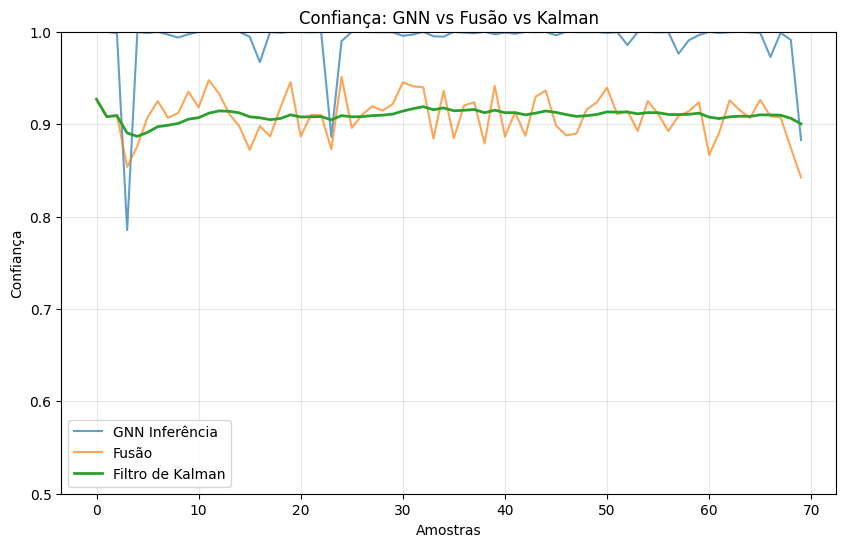

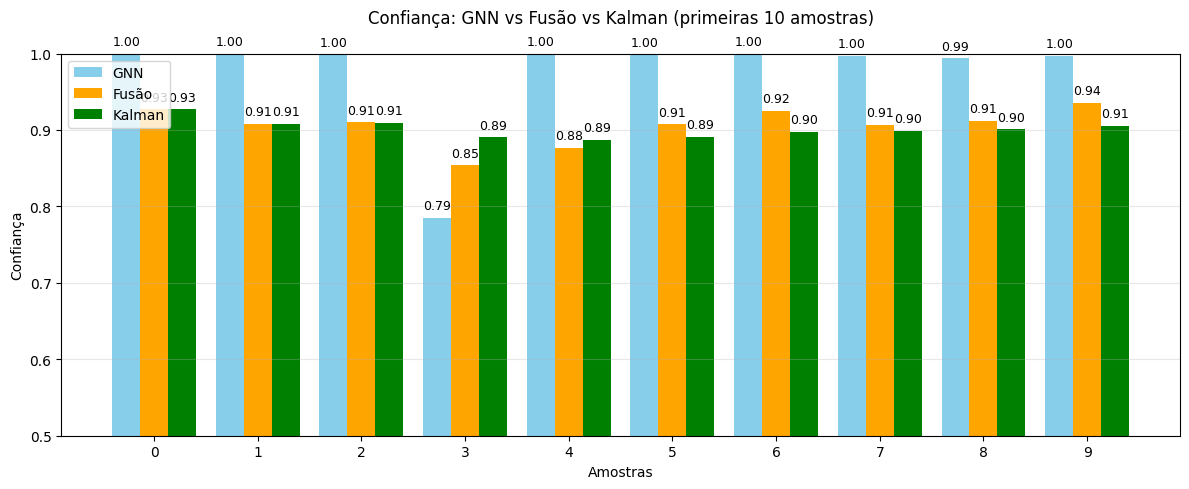

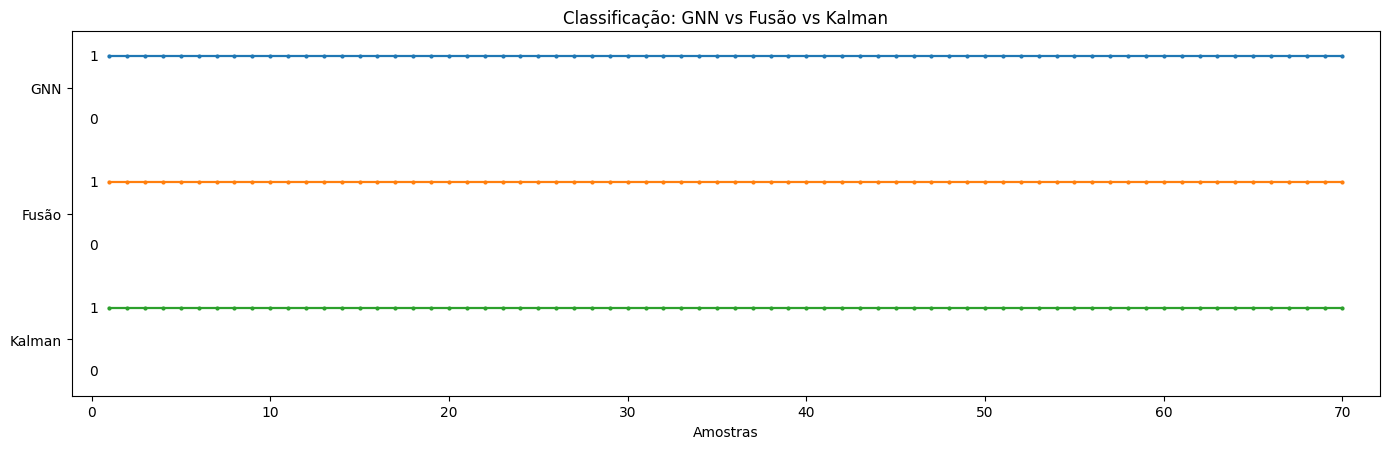

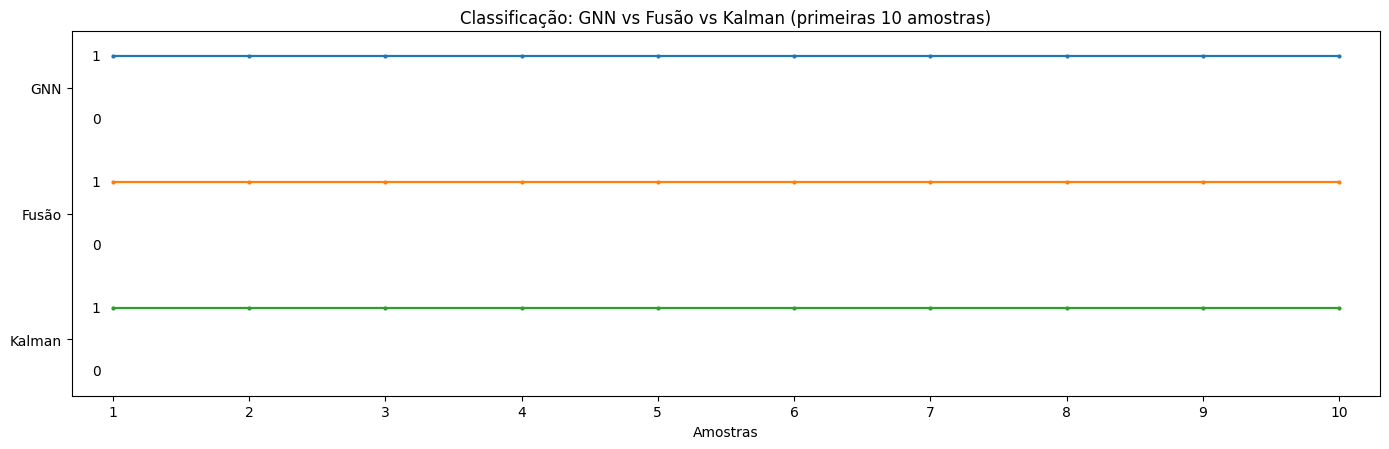

In [186]:
%run 7.results.ipynb